<a href="https://colab.research.google.com/github/VasaviLagishetty/MachineLearning/blob/master/Classification/Support%20Vector%20Machine/support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM)

## Importing the libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [0]:
url = "https://raw.githubusercontent.com/VasaviLagishetty/MachineLearning/master/Classification/Support%20Vector%20Machine/Social_Network_Ads.csv"
dataset = pd.read_csv(url)
#print(dataset)
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 0)

## Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
x_train = scx.fit_transform(x_train)
x_test = scx.transform(x_test)

## Training the SVM model on the Training set

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Predicting the Test set results

In [6]:
y_pred = classifier.predict(x_test)
print('Actual Output')
print(y_test)
print('Predicted Output')
print(y_pred)

Actual Output
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]
Predicted Output
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


## Making the Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
cm

array([[66,  8],
       [ 2, 24]])

## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


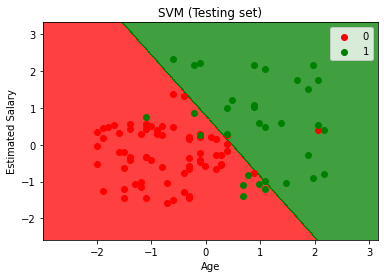

In [9]:
from matplotlib.colors import ListedColormap
x_set,y_set = x_test,y_test
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step = 0.01),
                    np.arange(start = x_set[:,1].min()-1,stop = x_set[:,1].max()+1, step = 0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75,cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],
              c = ListedColormap(('red','green'))(i),label = j)
plt.title('SVM (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()